# Chapter 2: The impact of hand washing at Vienna General

For additional context see chapter 2 of [The Virus of Variation & Process Behavior Charts: A Guide for the Perplexed](https://www.brokenquality.com/book).

In [56]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline

## Get data

In [57]:
# Establish the dataset_url
dataset_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation-and-pbcs/refs/heads/main/data/01-vienna-general-yearly-births-deaths-ratio-by-clinic-data.csv'

# Get data function
def get_data(dataset_url) -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Get data
df = get_data(dataset_url)

# Specify 'Year' column as dtype string
df['Year'] = df['Year'].astype('string')

df.head()

,Clinic,Employee,Year,Births,Deaths,Death-to-Birth Ratio,Note
0,1st Clinic,Students & Doctors,1833,3737,197,5.3,Second clinic started
1,1st Clinic,Students & Doctors,1834,2657,205,7.7,NaN
2,1st Clinic,Students & Doctors,1835,2573,143,5.6,NaN
3,1st Clinic,Students & Doctors,1836,2677,200,7.5,NaN
4,1st Clinic,Students & Doctors,1837,2765,251,9.1,NaN


In [58]:
# Split dataframe according to clinic
first_clinic = df[df['Clinic'] == '1st Clinic']
second_clinic = df[df['Clinic'] == '2nd Clinic'].reset_index(drop=True)

## Fig 2.3: Tim series of death-to-birth ratios at Vienna General

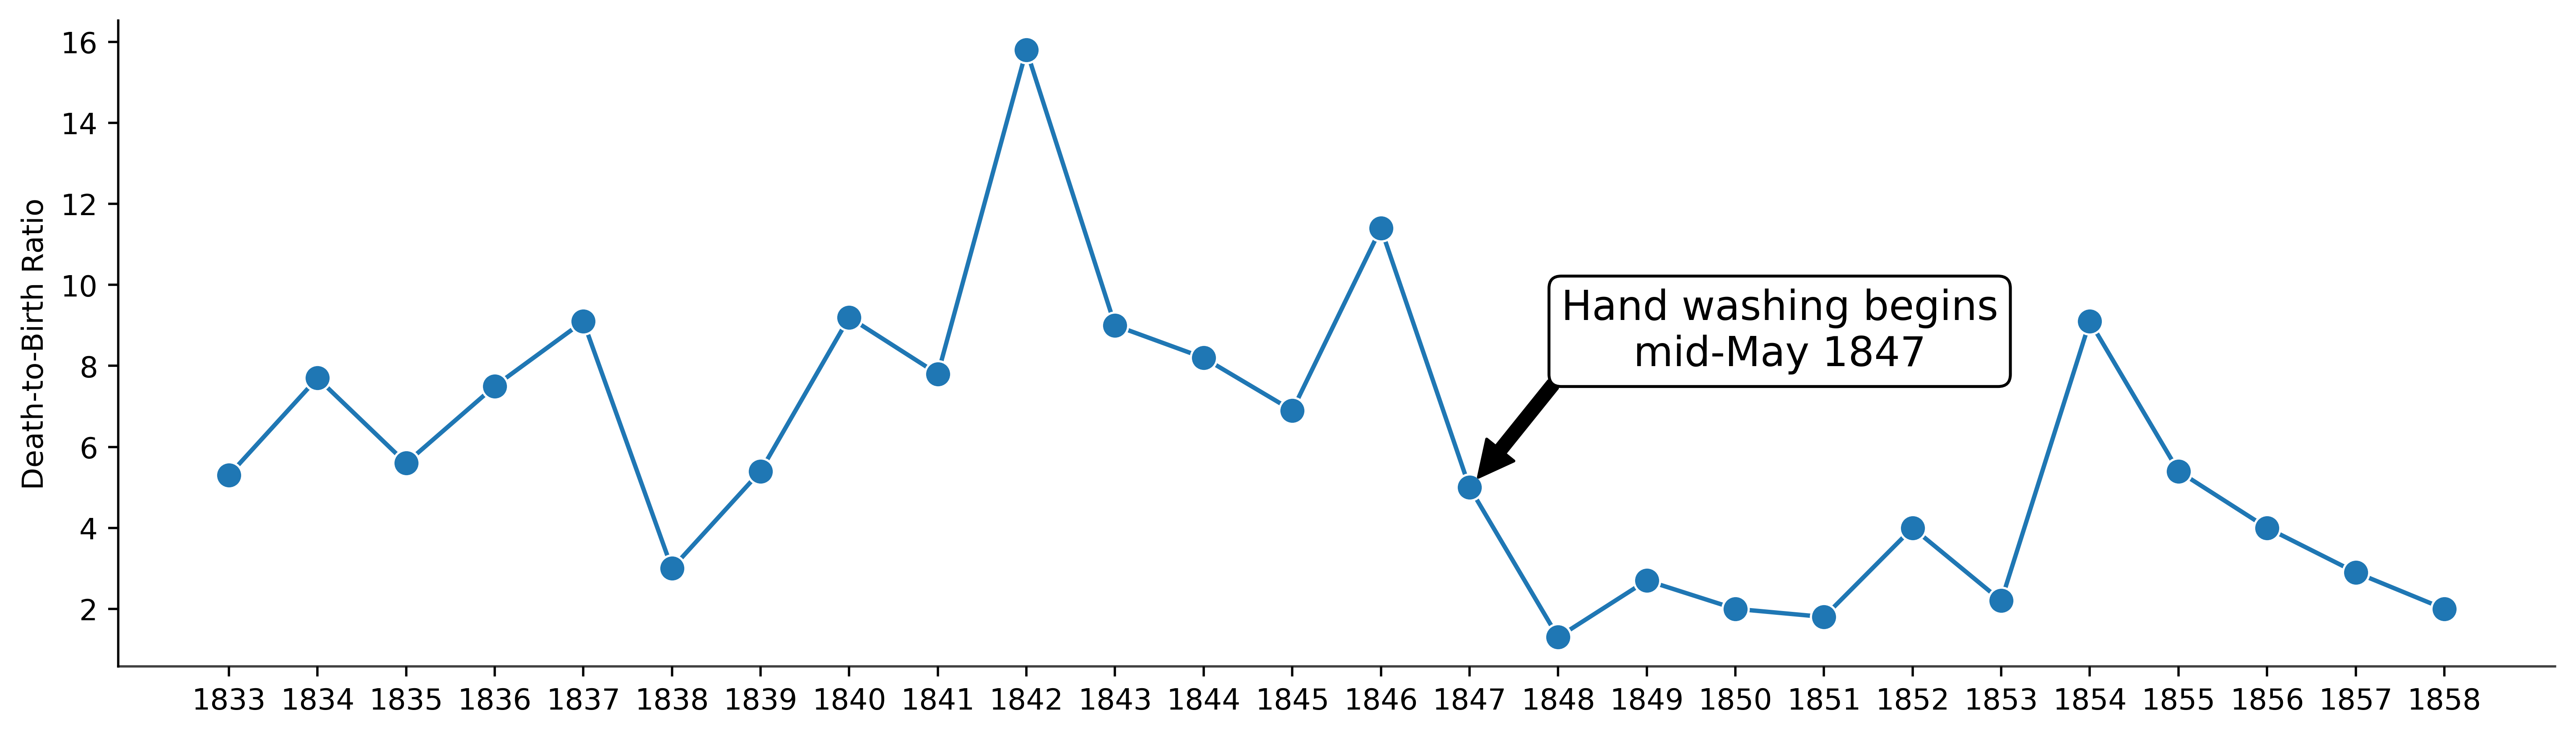

In [59]:
fig, ax = plt.subplots(figsize=(15,4), dpi=500)

sns.lineplot(data=first_clinic, 
             x='Year', 
             y='Death-to-Birth Ratio',
             marker='o', 
             markersize=9)

# Despine
sns.despine()
ax.spines['bottom'].set_alpha(0.75)
# Remove xlabel
ax.set_xlabel('')

# Add annotation with arrow
plt.annotate('Hand washing begins\nmid-May 1847', 
             xy=(14.1,5.25), 
             xytext=(17.5,8), 
             color='black', 
             fontsize=14,
             ha='center',
             arrowprops=dict(facecolor='black'),
             bbox=dict(facecolor='white',boxstyle='round',edgecolor='black'))

# Show plot
plt.show()

## Fig 2.4: Time series with the average

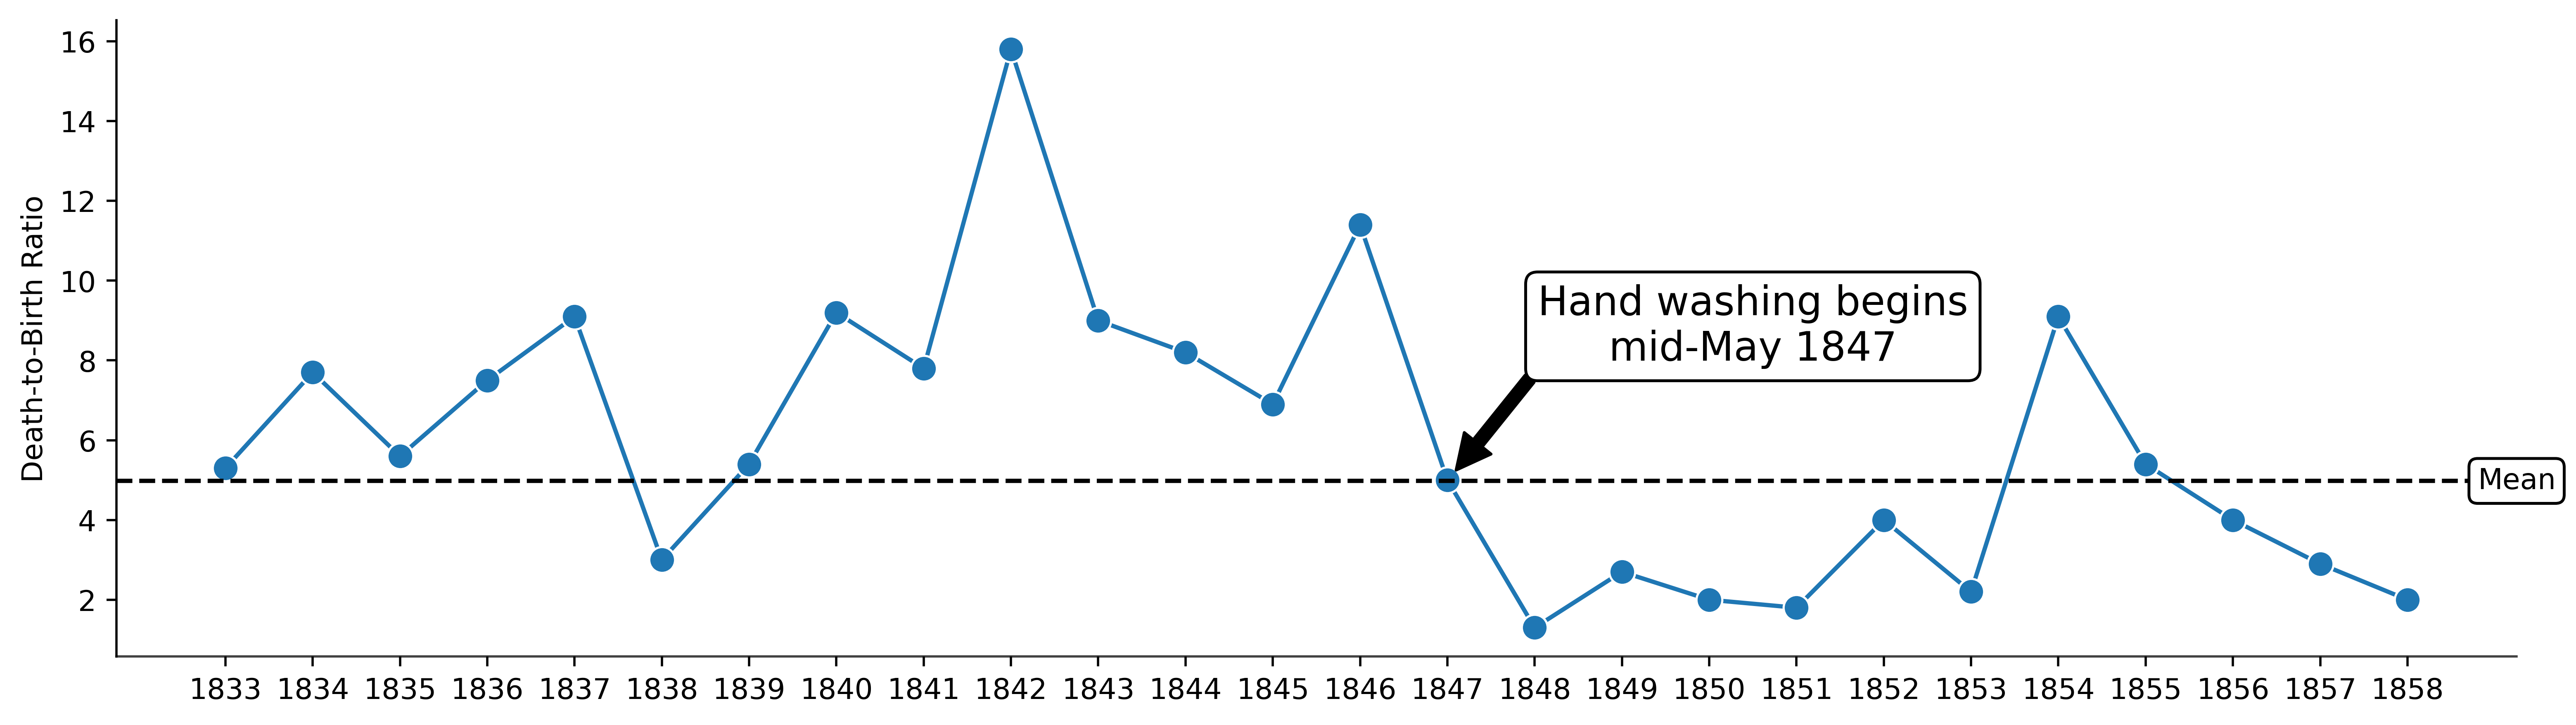

In [60]:
# Calculate the mean of the first clinic ratios
first_clinic_mean = round(df['Death-to-Birth Ratio'].mean(),3)

# Create figure and axis
fig, ax = plt.subplots(figsize=(15,4), dpi=500)

# Plot data in line plot
sns.lineplot(data=first_clinic, 
             x='Year', 
             y='Death-to-Birth Ratio',
             marker='o', 
             markersize=9)

# Show mean 
ax.axhline(first_clinic_mean, ls='--',c='black')

# bbox properties 
bbox_props_centerline = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
# Add mean label
ax.text(ax.get_xlim()[1] * 1.0, first_clinic_mean, 'Mean', color='black', ha='center', va='center', bbox=bbox_props_centerline)

# Set spine parameters
ax.spines[['top','right']].set_visible(False)
ax.spines['bottom'].set_alpha(0.75)
# Remove xlabel
ax.set_xlabel('')

# Add annotation with arrow
plt.annotate('Hand washing begins\nmid-May 1847', 
             xy=(14.1,5.25), 
             xytext=(17.5,8), 
             color='black', 
             fontsize=14,
             ha='center',
             arrowprops=dict(facecolor='black'),
             bbox=dict(facecolor='white',boxstyle='round',edgecolor='black'))

# Show plot
plt.show()

## Fig 2.5: X Chart of Vienna General ratios

In [61]:
# Specify round_value
round_value = 0

# Disaggregate the dataframe 
data = first_clinic["Death-to-Birth Ratio"]
moving_ranges = round(abs(data.diff()),round_value)
labels = first_clinic["Year"]

# Add moving ranges to df as column
# first_clinic = first_clinic.copy()
# first_clinic['Moving Ranges'] = pd.Series(moving_ranges)

# Calculate the mean
mean = round(data.mean(),round_value)
# Calculate the average moving range 
average_mR = round(moving_ranges.mean(),round_value)

# Define the value of C1 and C2and calculate the UPL and LPL
C1 = 2.660
C2 = 3.268
# Calculate the process limits
UPL = round(mean + (C1*AmR),round_value)
LPL = round(max(0,mean - (C1*AmR),round_value))

# Calculate process limit range (PLR)
PLR = UPL - LPL

# Calculate the Upper Range Limit
URL = round(C2*AmR,round_value)

In [62]:
# Specify tickinterval
tickinterval = 5

# Create masking parameters for values greater than and less than the process limits on X-chart
upper_lim = np.ma.masked_where(data < UPL, data)
lower_lim = np.ma.masked_where(data > LPL, data)
# Create masking parameters for values greater than URL on mR-chart
url_greater = np.ma.masked_where(moving_ranges <= URL, moving_ranges)
url_less = np.ma.masked_where(moving_ranges > URL, moving_ranges)

# Create list of tuples that specify value and color for mean, AmR, UPL, LPL, and URL
xchart_lines = [(mean,'black'), (UPL,'red'), (LPL,'red')]
mrchart_lines = [(AmR,'black'), (URL,'red')]
# Create list of tuples with y-coordinate and labels for x-chart process limits and centerline 
xchart_labels = [(UPL,UPL),(LPL,LPL),(mean,mean)]
# Create list of tuples with y-coordinate and labels for mR-chart process limit and centerline
mrchart_labels = [(URL,URL),(AmR,AmR)]

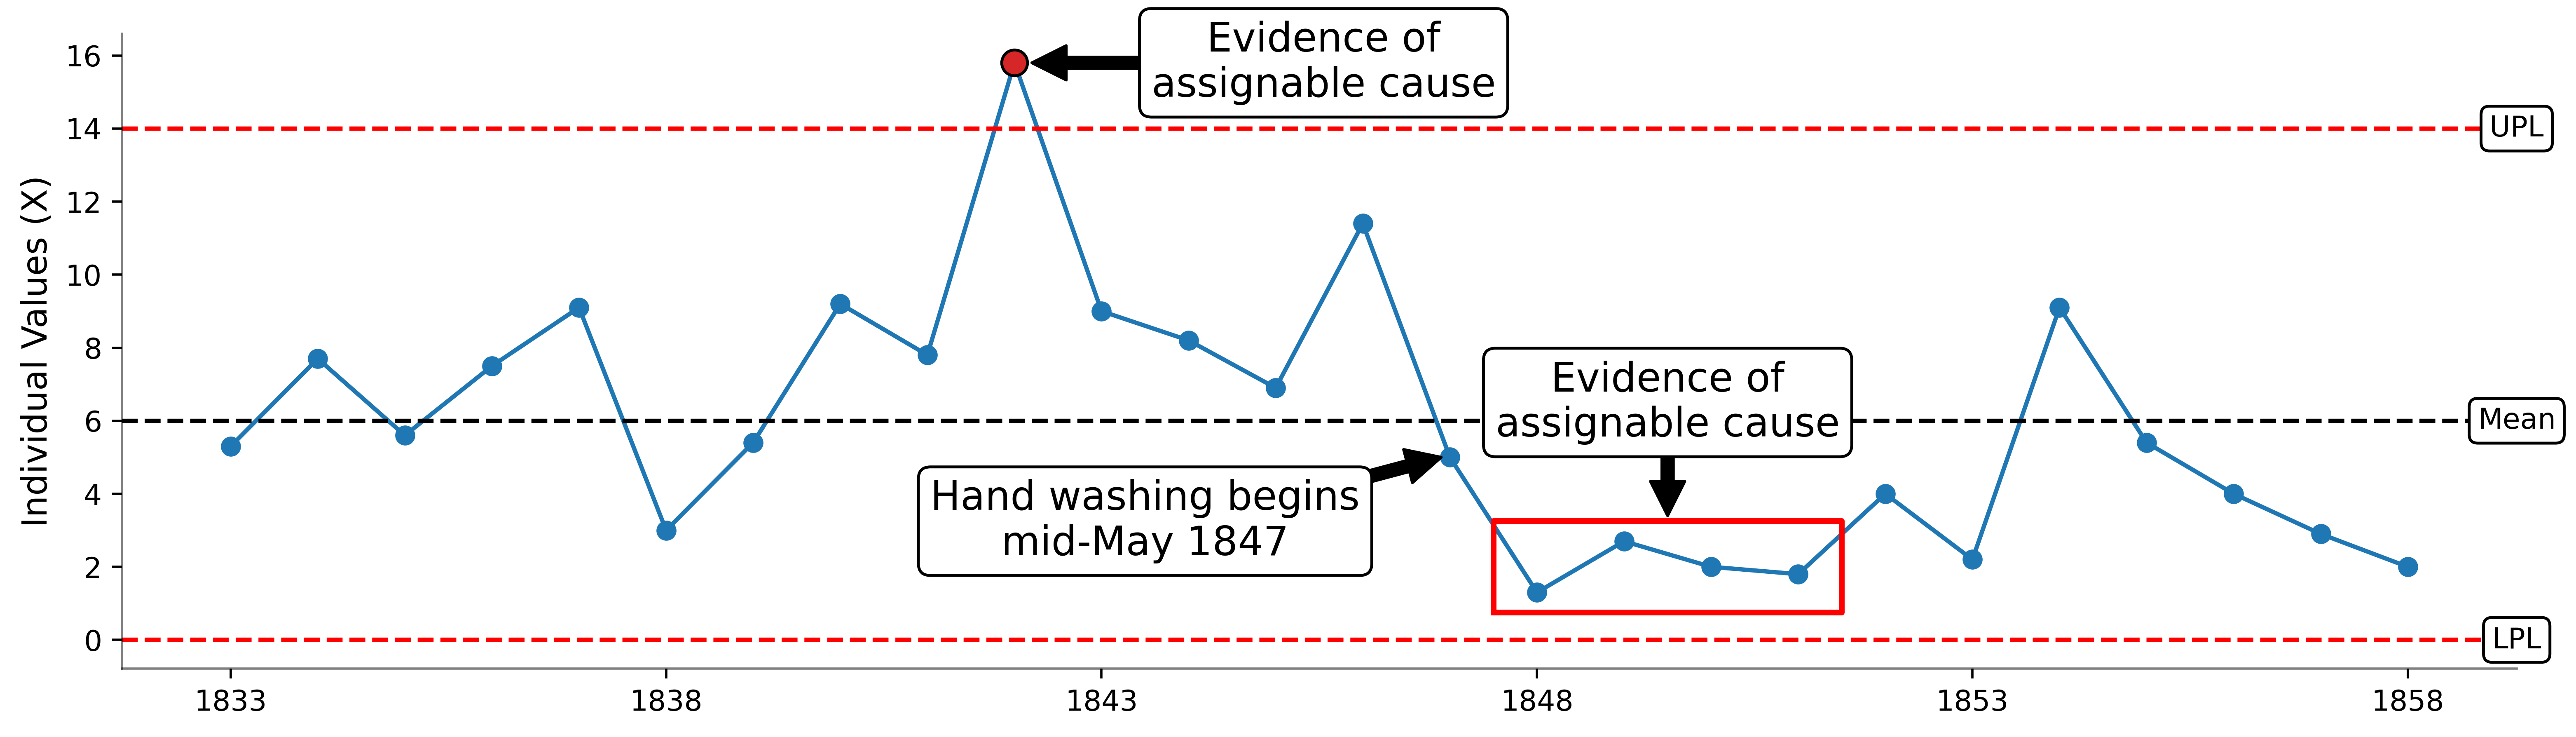

In [63]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(15,4), dpi=500)

# Plot data 
ax.plot(labels, data, marker='o')

# Add masking parameters to color values outside process limits
ax.plot(labels, lower_lim, marker='o', ls='none', color='tab:red',
        markeredgecolor='black', markersize=9)
ax.plot(labels, upper_lim, marker='o', ls='none', color='tab:red',
        markeredgecolor='black', markersize=9)

# Add text labels for limits and centerline
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
ax.text(ax.get_xlim()[1] * 1.0, UPL, 'UPL', color='black', ha='center', va='center', bbox=bbox_props)
ax.text(ax.get_xlim()[1] * 1.0, LPL, 'LPL', color='black', ha='center', va='center', bbox=bbox_props)
ax.text(ax.get_xlim()[1] * 1.0, mean, 'Mean', color='black', ha='center', va='center', bbox=bbox_props)

# Add centerline and process limits 
for value, color in xchart_lines:
    plt.axhline(value, ls='--', c=color)

# Set the x-tick labels with increased intervals
tick_interval = tickinterval  # Increase this value to increase the spacing between ticks
tick_positions = np.arange(0, len(labels), tick_interval)
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels.iloc[tick_positions], rotation=0, ha='center') 

# Add annotation for highlighting value that satisfies Rule 1
plt.annotate('Evidence of\nassignable cause', 
             xy=(9.2,15.8),
             xytext=(12.55, 15.8),  # Position of the text
             fontsize=14,
             color='black',
             ha='center',
             va='center',
             arrowprops=dict(facecolor='black'),
             bbox=dict(facecolor='white',boxstyle='round',edgecolor='black'))

# Add box for highlighting range of values satisfying Rule 3
start_index = 14.5
end_index = 18.5  
y_min = 0.75  
y_max = 3.25    

# Add a border using plt.plot()
plt.plot([start_index, end_index, end_index, start_index, start_index], 
         [y_min, y_min, y_max, y_max, y_min], color='red', linewidth=2)

# Add annotation with arrow
plt.annotate('Hand washing begins\nmid-May 1847', 
             xy=(13.9,5), 
             xytext=(10.5,3.25), 
             color='black', 
             fontsize=14,
             ha='center',
             va='center',
             arrowprops=dict(facecolor='black'),
             bbox=dict(facecolor='white',boxstyle='round',edgecolor='black'))

# Adding annotations
plt.annotate('Evidence of\nassignable cause', 
             xy=(16.5, 3.4),  # x, y coordinates of the annotation
             xytext=(16.5, 6.5),  # Position of the text
             fontsize=14,
             color='black',
             horizontalalignment='center',
             va='center',
             arrowprops=dict(facecolor='black'),
             bbox=dict(facecolor='white',boxstyle='round',edgecolor='black'))

# Specify axis labels and title
plt.xlabel("",fontsize=12)
plt.ylabel("Individual Values (X)", fontsize=12)
plt.title("", fontsize=14)

# Specify spine visibility 
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)

# Show plot
plt.show()

## Fig 2.6: Comparison of death-to-birth ratios

In [64]:
# Split first clinc into 'Before' and 'After' hand washing
before_washing = first_clinic[:14]
after_washing = first_clinic[14:].reset_index(drop=True)

# Create dataframe list
df_list = [before_washing, after_washing]

# Create label list
label_list = ['Before hand washing', 'After hand washing']

In [65]:
# Constants for control limits
C1 = 2.660
C2 = 3.268

# Specify dataframe column as condition
condition = 'Death-to-Birth Ratio'
x_labels = 'Year' 

# Helper function to calculate statistics and limits
def calculate_limits(df, condition):
    mean = df[condition].mean()
    diff_amr = abs(df[condition].diff()).mean()
    UPL = mean + C1 * diff_amr
    LPL = max(mean - C1 * diff_amr, 0)
    URL = C2 * diff_amr
    return mean, diff_amr, UPL, LPL, URL

# Calculate statistics
stats = [calculate_limits(df, condition) for df in df_list]

# Isolate column to be used for x_labels
x_labels_for_plots = [df[x_labels] for df in df_list]

# Create results dataframe
parameters_df = pd.DataFrame(stats, columns=['Mean', 'AmR', 'UPL', 'LPL', 'URL'])
parameters_df['Labels'] = label_list
parameters_df['PLR'] = parameters_df['UPL'] - parameters_df['LPL']
parameters_df['data'] = [df[condition] for df in df_list]
parameters_df['mR'] = [abs(df[condition].diff()) for df in df_list]

# Determine predictability
parameters_df['Characterization'] = parameters_df.apply(
    lambda row: 'Predictable' if all(row['LPL'] <= x <= row['UPL'] for x in row['data']) else 'Unpredictable',
    axis=1
)

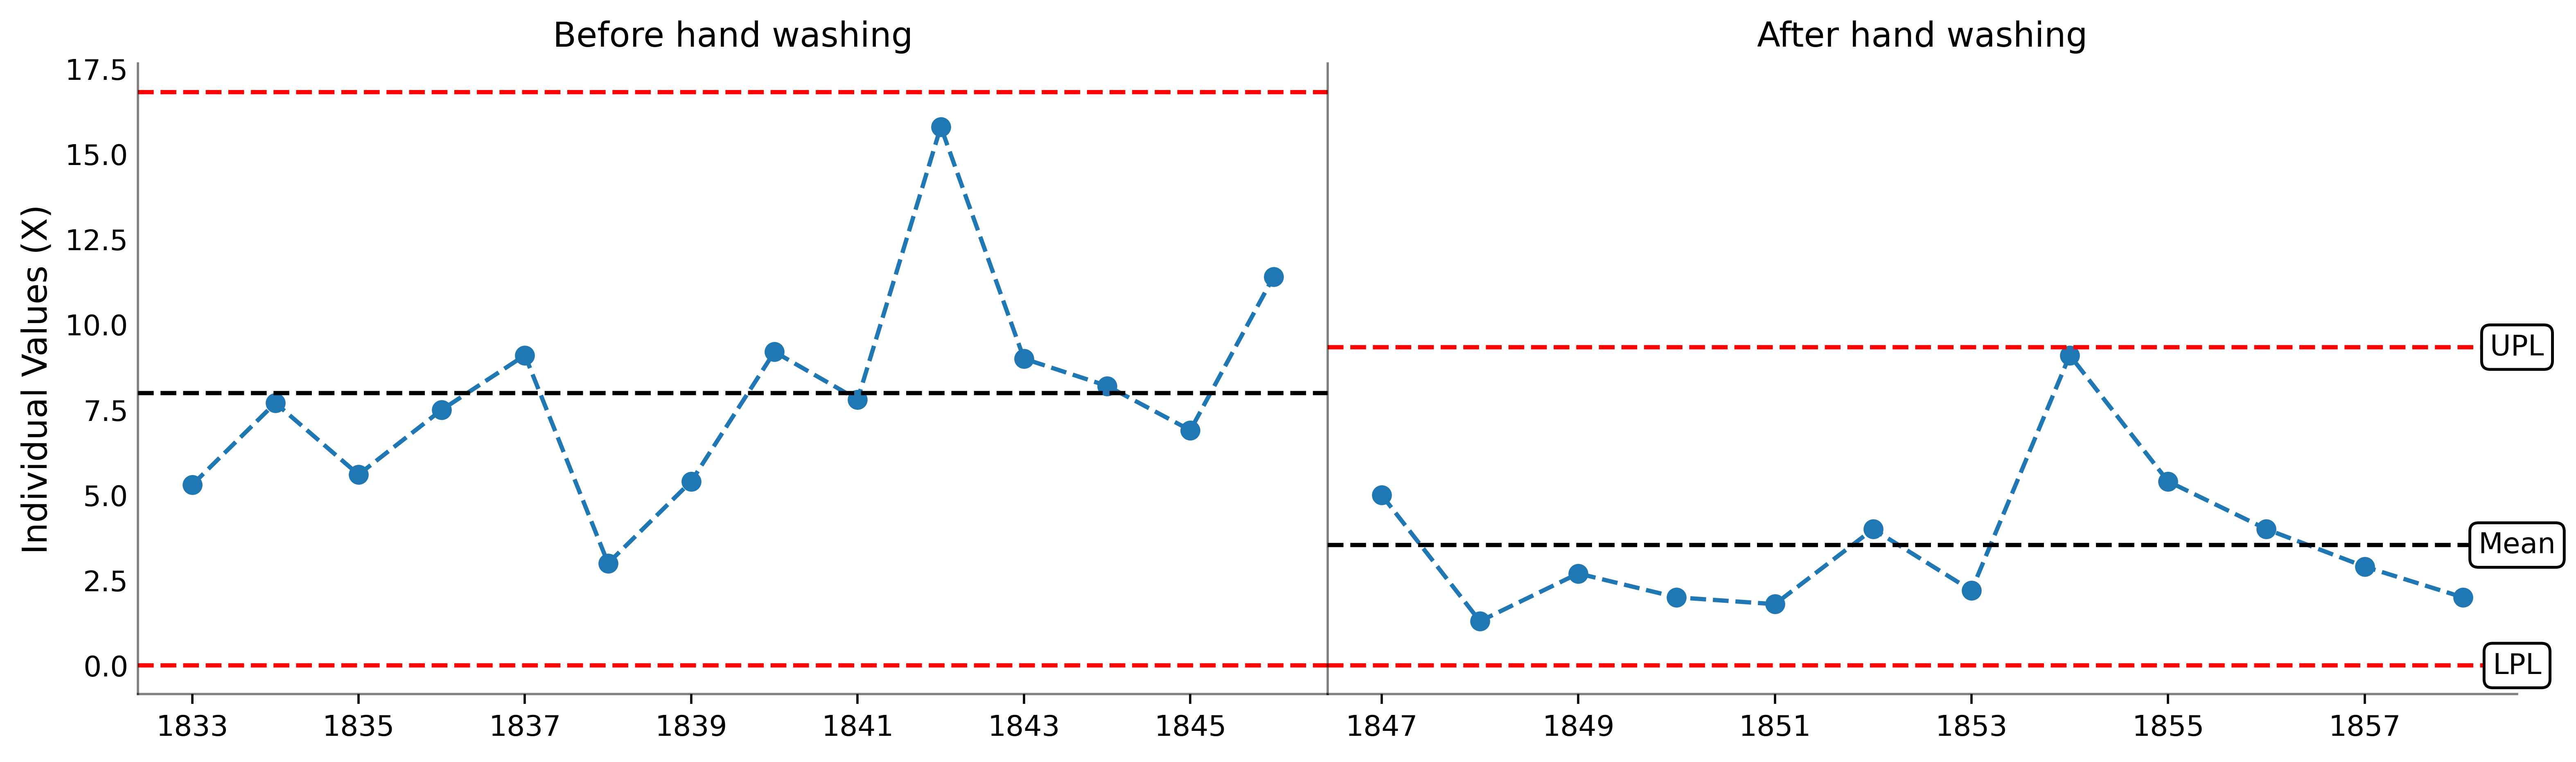

In [66]:
# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4), sharey=True, dpi=500)
plt.subplots_adjust(wspace=0)

# Flatten the axes
axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

# Plot each dataset
for idx, (data, UPL, LPL, label, ax, x_labels) in enumerate(zip(
    parameters_df['data'], 
    parameters_df['UPL'], 
    parameters_df['LPL'], 
    parameters_df['Labels'], 
    axes,
    x_labels_for_plots)):

    # Plot data
    ax.plot(data, marker='o', ls='--')

    # Masking and plotting limits
    ax.plot(np.ma.masked_where(data < UPL, data), marker='o', ls='none', color='red', markeredgecolor='black', markersize=9)
    ax.plot(np.ma.masked_where(data > LPL, data), marker='o', ls='none', color='red', markeredgecolor='black', markersize=9)

    # Plotting lines for mean, UPL, and LPL
    mean = np.mean(data)
    ax.axhline(mean, ls='--', color='black')
    ax.axhline(UPL, ls='--', color='red')
    ax.axhline(LPL, ls='--', color='red')

    # Styling axes
    ax.grid(False)
    ax.set_title(label, fontsize=12)
    # Despine plot
    sns.despine()
    ax.tick_params(axis='y', which='both', length=0)
    ax.tick_params(axis='x', which='both')

    # Add y-label only to the first plot
    if idx == 0:
        ax.set_ylabel('Individual Values (X)', fontsize=12)

    # Set the x-tick labels with increased intervals
    tick_positions = np.arange(0, len(data), 2)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(x_labels[tick_positions], ha='center')

    for ax in axes:
        ax.spines[['left','bottom']].set_alpha(0.5)

# Create list of labels
limit_labels = ['UPL', 'LPL', 'Mean']

xlimit = axes[1].get_xlim()[1]

# Define the annotation data
annotations = [
    (limit_labels[0], xlimit, UPL, axes[1]),
    (limit_labels[1], xlimit, LPL, axes[1]),
    (limit_labels[2], xlimit, mean, axes[1]),
]

# Add annotations
for label, x_pos, y_pos, axis in annotations:
    axes[1].annotate(label,
                  xy=(x_pos, y_pos),
                  ha='center',
                  va='center',
                  bbox=dict(facecolor='white', boxstyle='round'))

# Show plot
plt.show()